# Coins classification
---

Complete the following cells in order to classify the following coins images:

![coins](images/coins.png)

as follows:

![coins classification](images/coins_classification.png)

Large coins count as 5 units, small copper coins count as 0.5 units, while small silver coins count as 1 unit.

#### Basic imports

In [250]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

(718, 957, 3)


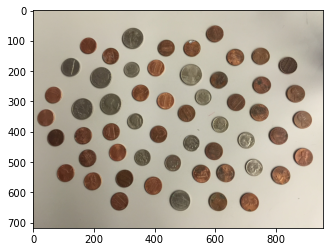

In [251]:
coins = cv2.imread('images/coins.png')
coins = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)

print(coins.shape)

plt.imshow(coins)

1. Select a color space that allows you to obtains a specific, and useful, characteristic from the coin image. Plot an image of said characteristic from the coins image. Remember to apply all the preprocessing steps that may be requiered.

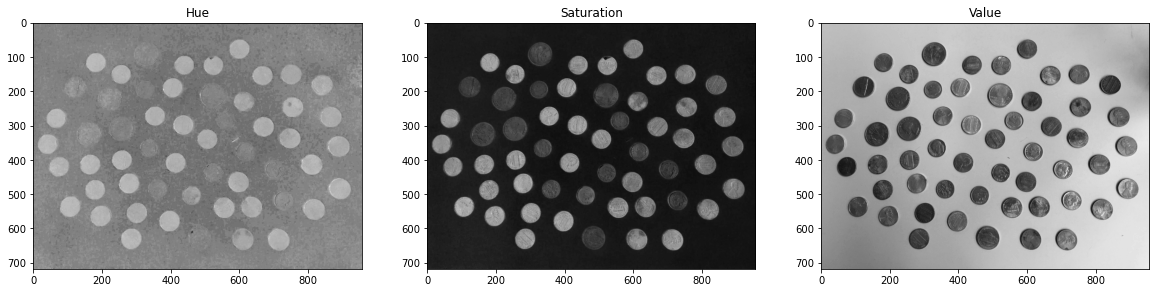

In [252]:
coins_copy = np.copy(coins)
coins2 = np.copy(coins)
# TO DO: Obtain a characteristic and plot it.
# low_hsv = np.array([0,100,50])
# high_hsv = np.array([0,255,255])
coins_copy = cv2.cvtColor(coins, cv2.COLOR_BGR2HSV)
coins_copy_RGB = coins
# PARA MONEDAS DORADAS 

# MASCARA PARA OBTENER MODENAS DORADAS UNICAMENTE 

# APLICAMOS THRESHOLD

h = coins_copy[:,:,0]
s = coins_copy[:,:,1]
v = coins_copy[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')




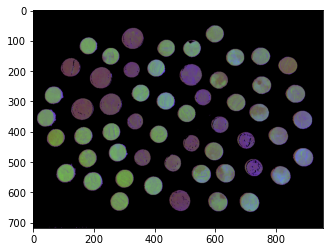

In [253]:
# mask_hsv = cv2.inRange(coins_copy,np.array([20,92,0]),np.array([255,255,255]))
mask_hsv = cv2.inRange(coins_copy,np.array([20,45,0]),np.array([255,255,255]))

golden_coins = np.copy(coins_copy)
golden_coins[mask_hsv==0] = [0,0,0]

plt.imshow(golden_coins)



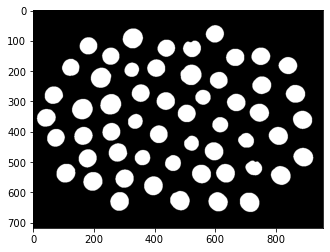

In [254]:
gray_gcoins = cv2.cvtColor(golden_coins,cv2.COLOR_RGB2GRAY)

gray_gcoins = cv2.GaussianBlur(gray_gcoins,(25,25),0)

kernel = np.ones((21,21), np.uint8)

opening = cv2.morphologyEx(gray_gcoins, cv2.MORPH_OPEN, (kernel))

retval, binary = cv2.threshold(gray_gcoins, 100, 255, cv2.THRESH_OTSU)

# plt.imshow(binary, cmap = 'gray') 

plt.imshow(binary, cmap = 'gray') 



2. Obtain the coin contours and plot and image of all the contours. Add all the code cells that may be required.

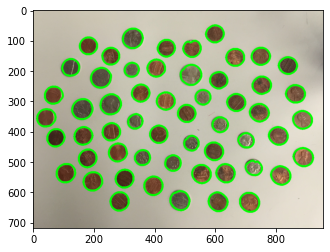

In [255]:
# TO DO: Plot an image of the contours of the coins.

(contours, _) = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# (contours, _) = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

contours_image = np.copy(coins_copy_RGB)
all_contours = cv2.drawContours(contours_image, contours, -1, (0,255,0), 5)
plt.imshow(all_contours)


3. Using the contour features, obtain any feature that may be useful to classify the coins. Store the feature in a dictionary for future reference.

33
32
31
32
31
31
30
32
31
31
32
27
26
25
30
32
30
30
24
26
29
31
30
29
29
26
25
31
31
29
31
34
34
30
30
25
30
31
29
31
29
34
34
24
29
28
30
30
30
28
29
29
29
33
29
29


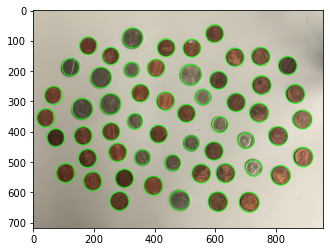

In [256]:
# TO DO: Obtain a useful contour feature to clasify the coins.
cropped_image = np.copy(coins2)
details = {}
key = 0
i = 0
for selected_contour in contours:
    if(selected_contour is not None):
        (x,y),radius = cv2.minEnclosingCircle(selected_contour)
        center = np.int0((x,y))
        radius = int(radius)
        cv2.circle(cropped_image,center,radius,(0,255,0),2)
        info = [center,radius]
        details[key] = [center, radius]
        key += 1
        print(radius)


plt.imshow(cropped_image)


print(radius)

4. Separate the coins based on color. Obtain the average color of each coin, and store this information in a dictionary.

In [257]:
# TO DO: Obtain the average color of each coin, and store it for future use.
i = 0
color = {}
inx = 0

# for x in range(coins_copy.shape[0]):
#     for y in range(coins_copy.shape[1]): 
#         if x == details[i][0][0] and y == details[i][0][1]:
#             color[inx] = coins_copy[x,y]
#             inx += 1
#             i += 1  
# print(color)
           
for x in range(coins_copy.shape[0]):
    for y in range(coins_copy.shape[1]): 
        for i in range(len(details)):
            if x == details[i][0][0] and y == details[i][0][1]:
                centro = [x,y]
                color[inx] = [centro, coins_copy[x,y]]
                inx += 1

print(color)

{0: [[43, 355], array([ 99,  25, 211], dtype=uint8)], 1: [[68, 281], array([ 98,  28, 203], dtype=uint8)], 2: [[75, 420], array([ 98,  25, 207], dtype=uint8)], 3: [[108, 536], array([108, 152, 138], dtype=uint8)], 4: [[124, 188], array([110, 155, 102], dtype=uint8)], 5: [[162, 325], array([ 95,  25, 203], dtype=uint8)], 6: [[165, 414], array([110, 156, 124], dtype=uint8)], 7: [[180, 488], array([ 95,  25, 200], dtype=uint8)], 8: [[182, 117], array([106,  66,  73], dtype=uint8)], 9: [[197, 563], array([ 95,  25, 203], dtype=uint8)], 10: [[224, 222], array([105,  70,  73], dtype=uint8)], 11: [[255, 309], array([ 95,  25, 200], dtype=uint8)], 12: [[256, 151], array([ 98,  31, 183], dtype=uint8)], 13: [[257, 400], array([ 90,  21, 197], dtype=uint8)], 14: [[279, 468], array([ 95,  26, 196], dtype=uint8)], 15: [[285, 629], array([ 90,  21, 195], dtype=uint8)], 16: [[301, 554], array([100,  76, 111], dtype=uint8)], 17: [[325, 196], array([108,  60, 111], dtype=uint8)], 18: [[328, 92], array(

5. Using the information that you generated, plot an image that adds a text with the value of each coin to the image at the position of each coin. Large coins are worth 5 units, small silver coins are worth 1 unit, while small copper coins are worth 0.5 units.

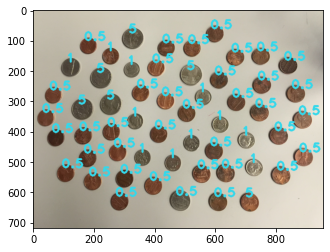

In [258]:
# TO DO: Using the dictionaries that you created, plot an image with the correct coin values


for idx, selected_contour in enumerate(contours):
    if(selected_contour is not None):
        moments = cv2.moments(selected_contour)

        cx = int(moments['m10']/moments['m00'])
        cy = int(moments['m01']/moments['m00'])

        # print(f'Centroid {idx}: ({cx} , {cy})')
        (x,y),radius = cv2.minEnclosingCircle(selected_contour)
        center = np.int0((x,y))
        radius = int(radius)
        if radius >= 33: 
            cv2.putText(coins_copy_RGB, "5", (cx-15, cy-15), cv2.FONT_HERSHEY_PLAIN, 3, (52, 216, 235), 5, cv2.LINE_8)
        elif radius == 27 or radius == 28 or radius == 26 or radius == 25 or radius == 24: 
            cv2.putText(coins_copy_RGB, "1", (cx-15, cy-15), cv2.FONT_HERSHEY_PLAIN, 3, (52, 216, 235), 5, cv2.LINE_8)
        elif radius == 29 or radius == 30 or radius == 32 or radius == 31: 
            cv2.putText(coins_copy_RGB, "0.5", (cx-15, cy-15), cv2.FONT_HERSHEY_PLAIN, 3, (52, 216, 235), 5, cv2.LINE_8)
   

plt.imshow(coins_copy_RGB)
